# **AM 207**: Homework 3

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday March 24th, 2016**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW3.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an executed status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW3.tar.gz or AM207_YOURNAME_HW3.zip


### Have Fun!
_ _ _ _ _

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats as stats
import pandas as pd
import pymc as pm

import re


# Problem 1: Employee Satisfaction Improvement
This problem is going to explore the differences between complete pooling, unpooling and partial pooling for a normal model with observed standard deviations. 

You are working for a consulting firm which is trying to find a good strategy to improve employee satisfaction for their customers. Your company ran pilot studies in eight different customer companies and measured the improvement in employee satisfaction after the plan had been implemented for two years. The data you are given is the mean and standard deviation of the satisfaction improvement, measured by a survey. 
You follow the nature of your data by modeling the effect of the strategie with a normal model. To simplify things you can assume that the different standard deviations are an effect of different sample sizes, and that there is actually one underlying observation variance:

$$ \sigma_j^2 = \frac{\sigma^2}{n_j}$$

Thus the difference in the observed standard deviations in the survey results are caused by having different numbers of survey answers $n_j$. 

Discuss, create and compare three different solutions for your model using PYMC or another sampling method of your choice:

* complete pooling
* unpooling
* partial pooling

In [3]:
# Here is the data
data = np.double(np.array([[29.5,18.4],[6.3,12.7],[-3.9,15.9],[7.2,10.2],[-2.1,9.0],[1.8,12.1],[19.6,7.3],[12,18.6]]))
data_means = data[:,0]
data_std = data[:,1]

#### Complete Pooling
Assumes all the data comes from the same underlying distribution, with a uniform prior distribution over the mean and variance. There are 8 observations. Goodness of fit plots below shows underfit.

 [-----------------100%-----------------] 50000 of 50000 complete in 7.1 secPlotting mu_prior
Plotting tau_prior


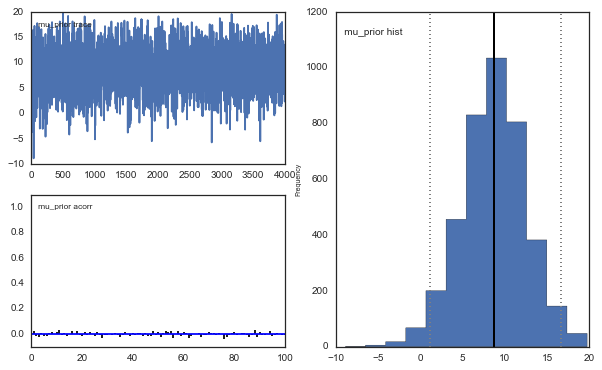

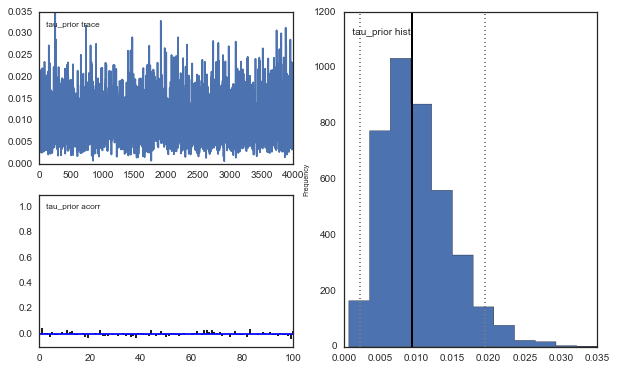

In [84]:
tau_prior = pm.Uniform('tau_prior', lower = 0, upper = 0.05)
mu_prior = pm.Uniform('mu_prior', lower = -10, upper = 20)
likelihood = pm.Normal('likelihood', mu = mu_prior, tau = tau_prior, value = data_means, observed = True)

model_cp = pm.Model([tau_prior,mu_prior, likelihood])
M_cp = pm.MCMC(model_cp)
M_cp.sample(iter=50000, burn=10000, thin = 10)

# plot of variables
pm.Matplot.plot(M_cp)


In [85]:
print 'MAP estimate for mu: ', np.mean(M_cp.trace('mu_prior')[:])
print 'std of MAP estimate for mu: ', np.std(M_cp.trace('mu_prior')[:])

MAP estimate for mu:  8.68197425781
std of MAP estimate for mu:  3.81770521398


 [-----------------100%-----------------] 50000 of 50000 complete in 10.9 secPlotting mu_prior
Plotting tau_prior
Plotting data_sim


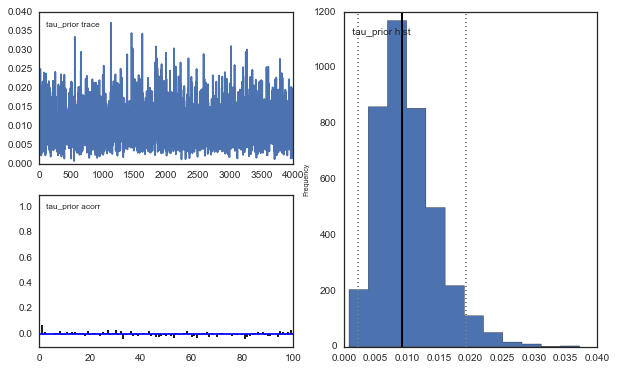

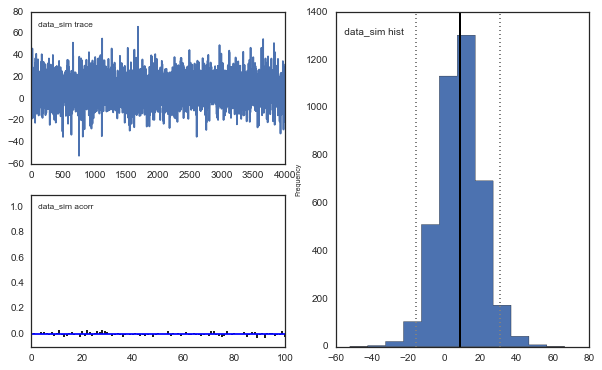

In [86]:
# posterior predictive
data_sim = pm.Normal('data_sim', mu_prior, tau_prior)
model_cp_postpred = pm.Model([tau_prior,mu_prior, data_sim])
M_cp_postpred = pm.MCMC(model_cp_postpred)
M_cp_postpred.sample(iter=50000, burn=10000, thin = 10)
pm.Matplot.plot(M_cp_postpred)

In [87]:
print 'Posterior Predictive estimate for mu: ', np.mean(M_cp_postpred.trace('mu_prior')[:])
print 'std of estimate for mu: ', np.std(M_cp_postpred.trace('mu_prior')[:])

Posterior Predictive estimate for mu:  8.7556966251
std of estimate for mu:  3.71997612115


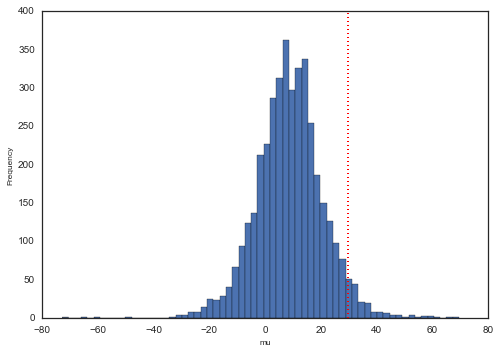

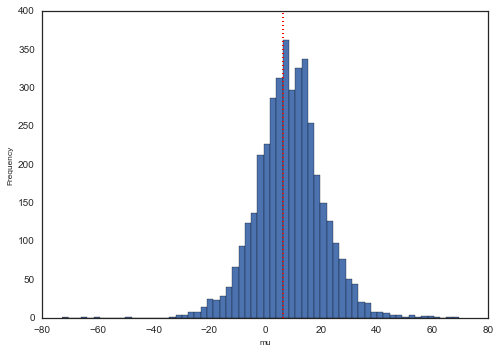

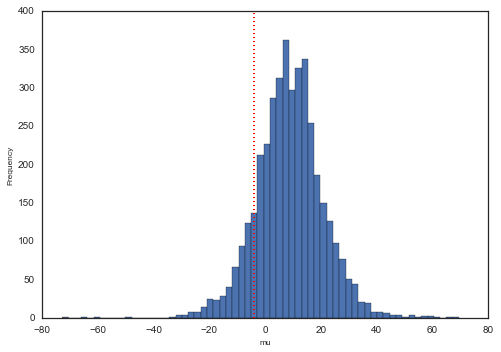

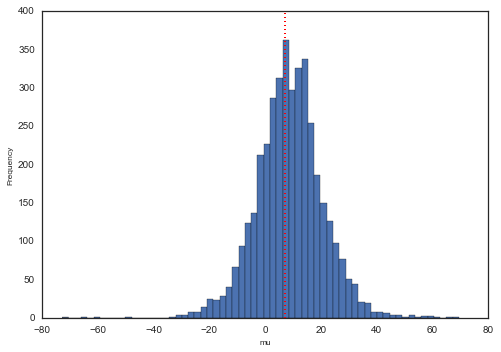

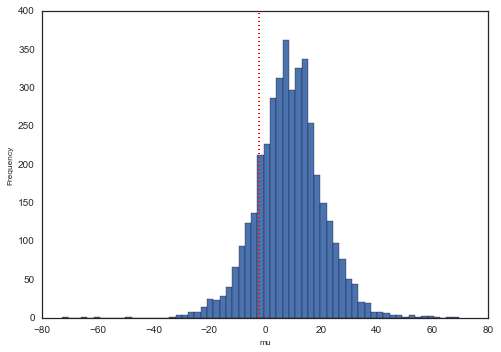

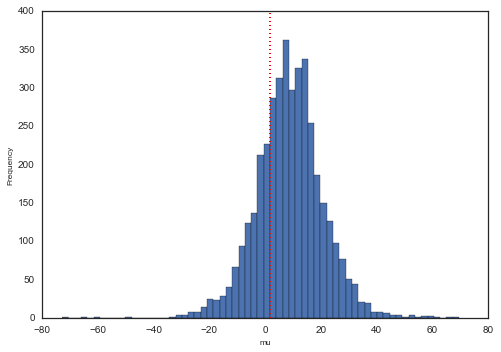

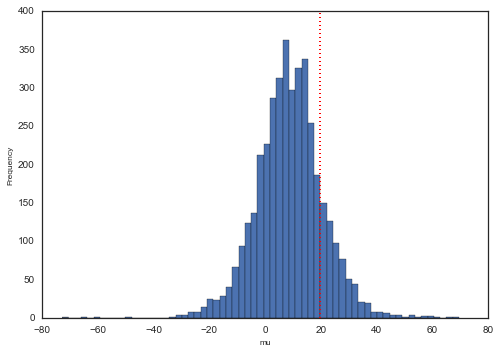

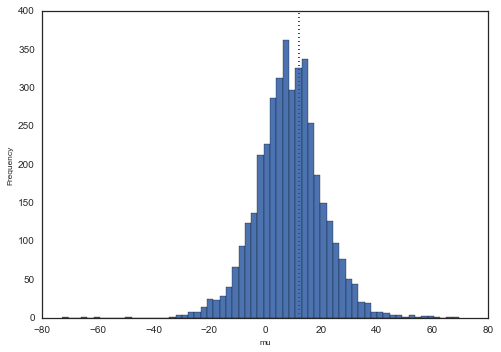

In [201]:
# goodness of fit
for i in range(len(data_means)):
    pm.Matplot.gof_plot(data_sim, data_means[i], name='mu')
    plt.show()
    

#### Unpooling
Assumes data comes from 8 different distributions, each with a uniform prior over it's own mean and standard deviation. Each model is fit seperately so we have 8 estimates. In each, there is one observation, so this results in overfit (Goodness of fit plots below). The posterior predictive results in very different values from the observation, which is expected for overfit models.

Company  1
 [-----------------100%-----------------] 50000 of 50000 complete in 7.0 secPlotting tau_prior
Plotting mu_prior


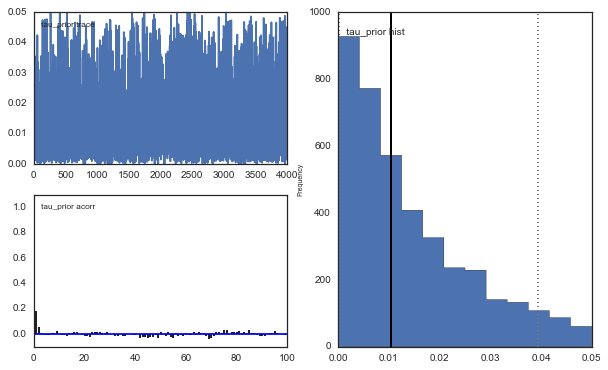

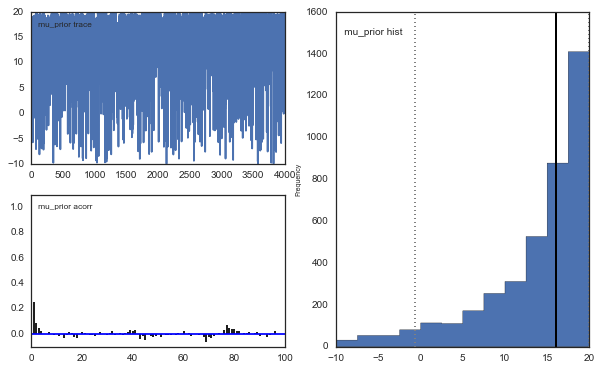

Observation for mu:  29.5
MAP estimate for mu:  13.7002580708
std of estimate for mu:  6.37470688451
Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 11.3 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior


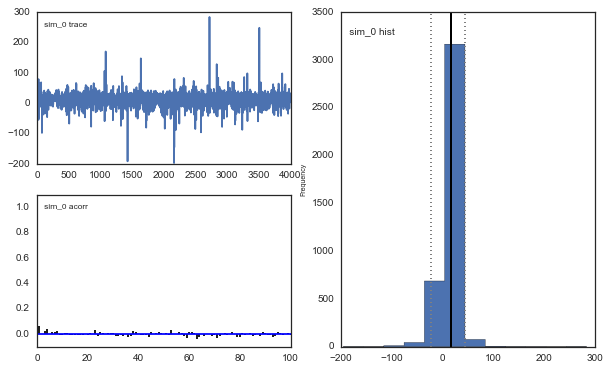

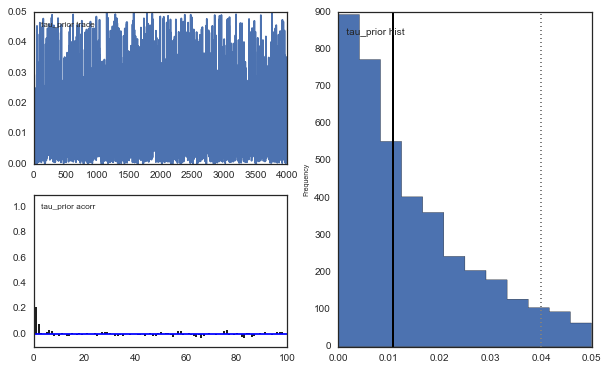

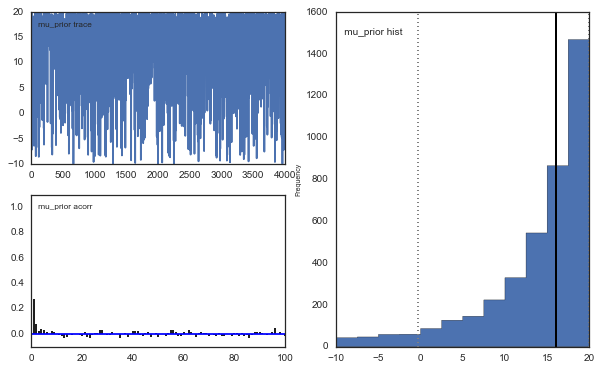

Observation for mu:  29.5
Posterior Predictive estimate for mu:  13.9158687384
std of estimate for mu:  6.31866267405
Goodness of Fit Plot


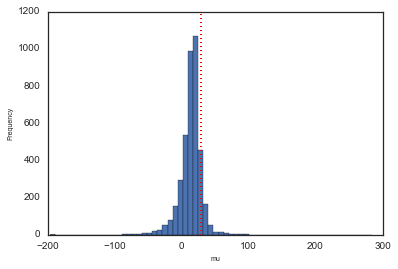

Company  2
 [-----------------100%-----------------] 50000 of 50000 complete in 14.8 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior


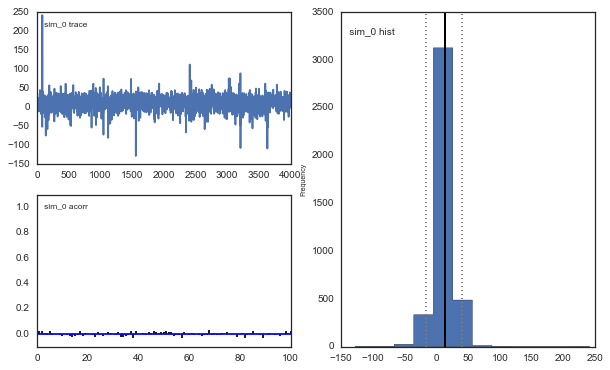

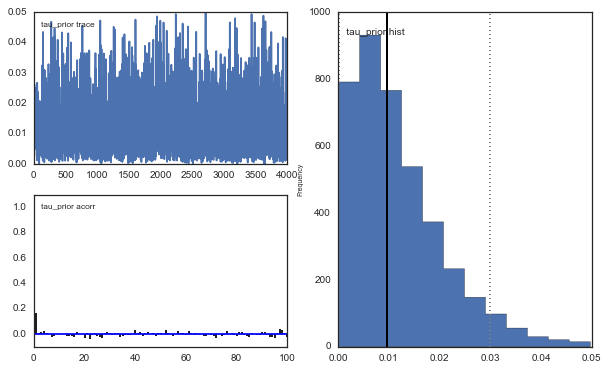

Observation for mu:  6.3
MAP estimate for mu:  12.9384716469
std of estimate for mu:  5.70772920299
Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 18.8 secPlotting sim_0
Plotting tau_prior
Plotting sim_1
Plotting mu_prior


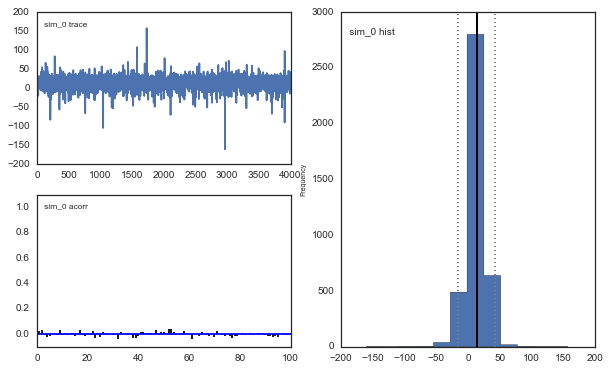

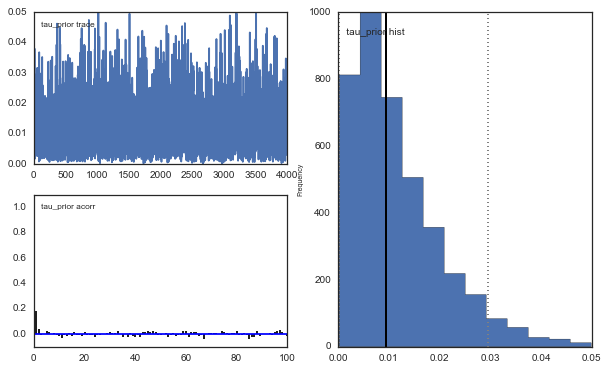

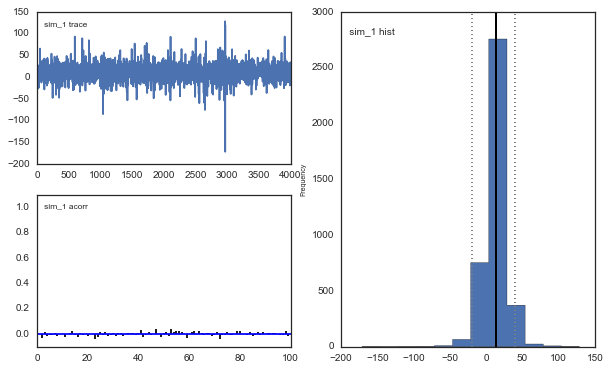

Observation for mu:  6.3
Posterior Predictive estimate for mu:  12.8922554046
std of estimate for mu:  5.68242164018
Goodness of Fit Plot


Company  3
 [-----------------100%-----------------] 50000 of 50000 complete in 19.6 secPlotting sim_0
Plotting tau_prior
Plotting sim_1
Plotting mu_prior


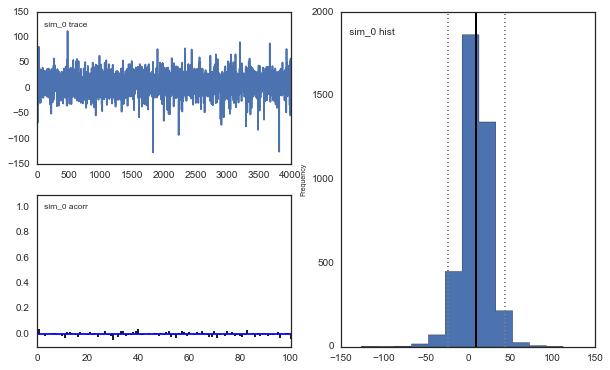

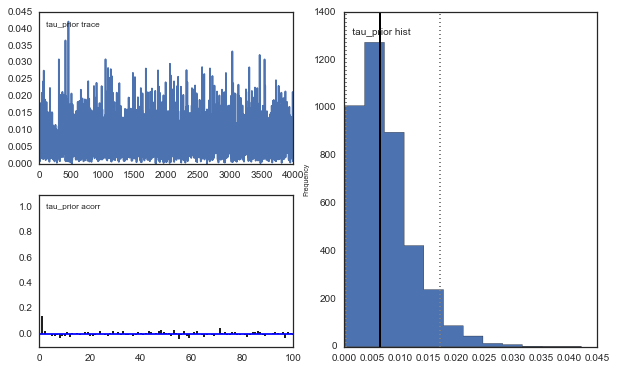

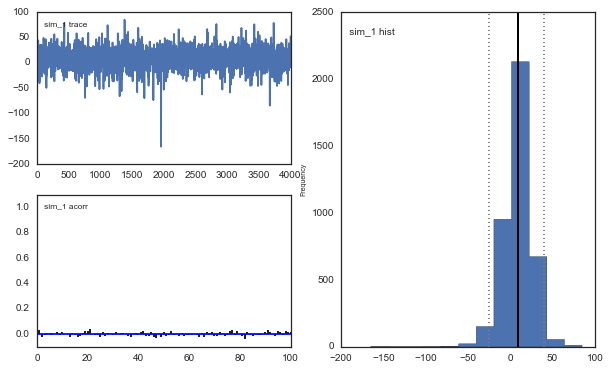

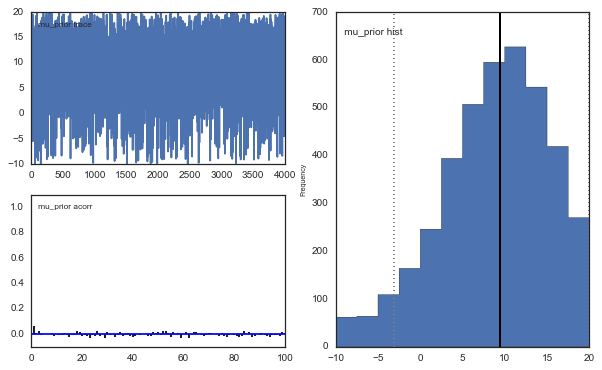

Observation for mu:  -3.9
MAP estimate for mu:  8.78579359653
std of estimate for mu:  6.36063703189
Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 22.4 secPlotting sim_0
Plotting tau_prior
Plotting sim_1
Plotting sim_2
Plotting mu_prior


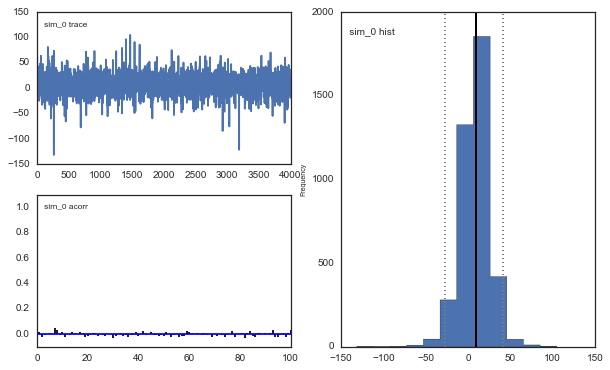

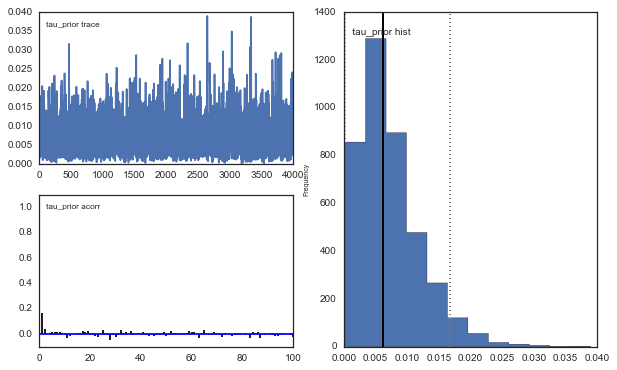

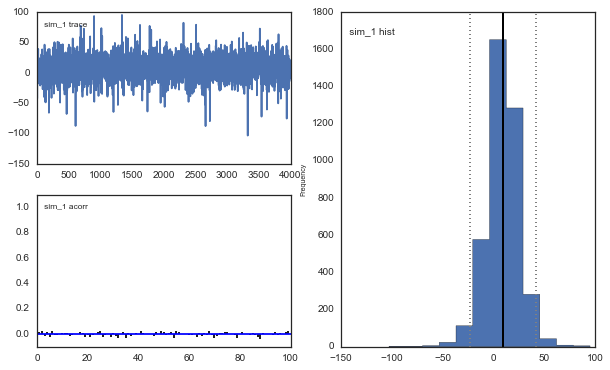

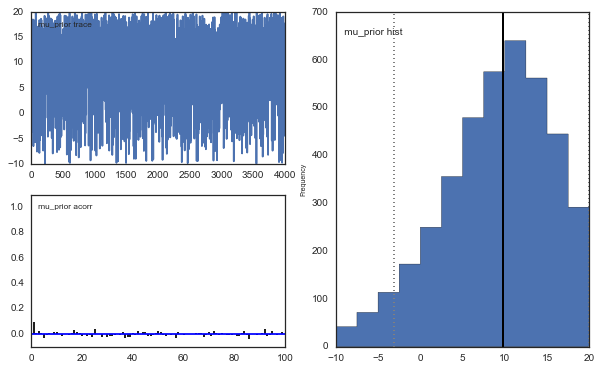

Observation for mu:  -3.9
Posterior Predictive estimate for mu:  8.97008670481
std of estimate for mu:  6.36241790881
Goodness of Fit Plot


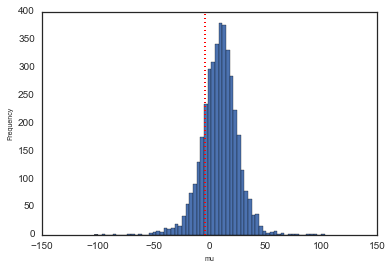

Company  4
 [-----------------100%-----------------] 50000 of 50000 complete in 20.3 secPlotting sim_0
Plotting tau_prior
Plotting sim_2
Plotting sim_1
Plotting mu_prior


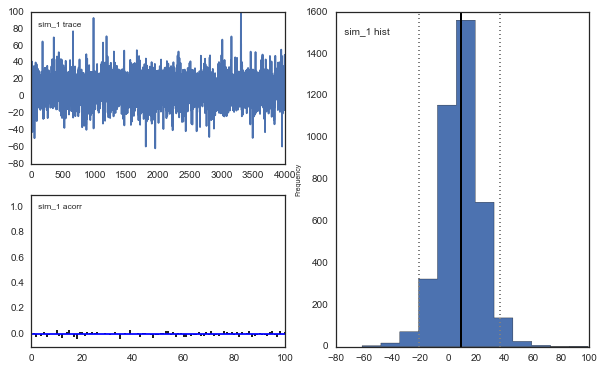

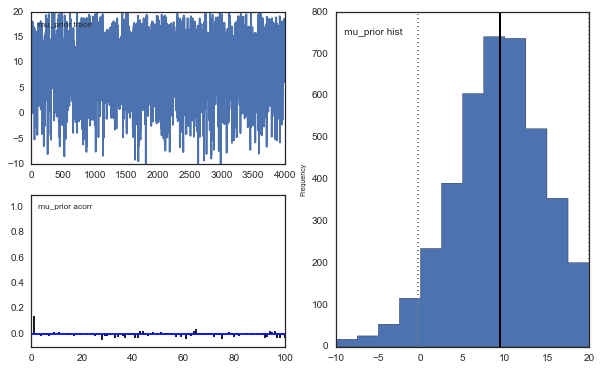

Observation for mu:  7.2
MAP estimate for mu:  9.09481142729
std of estimate for mu:  5.3286895323
Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 24.5 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_2
Plotting sim_3
Plotting sim_1


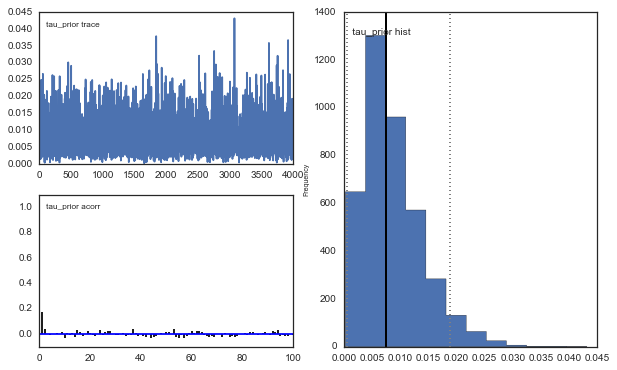

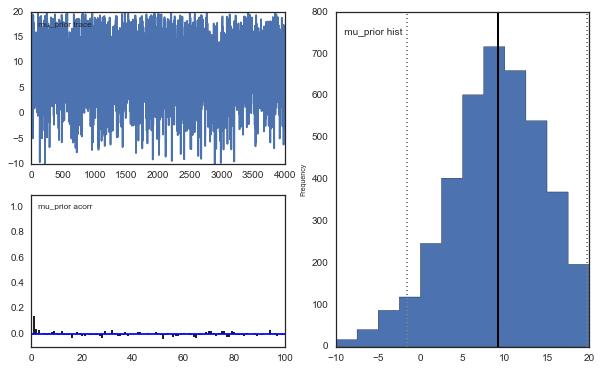

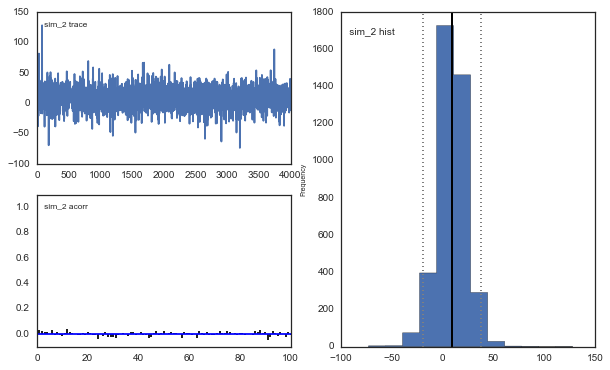

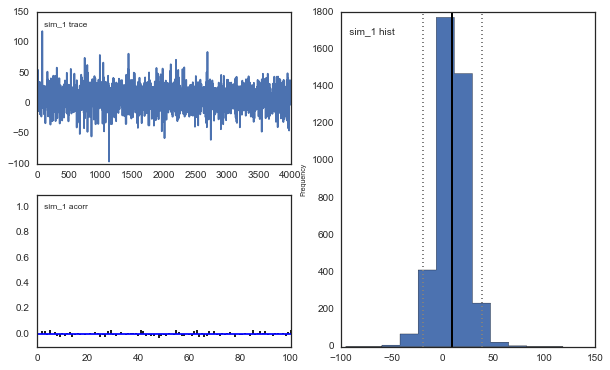

Observation for mu:  7.2
Posterior Predictive estimate for mu:  8.90356651812
std of estimate for mu:  5.57652063179
Goodness of Fit Plot


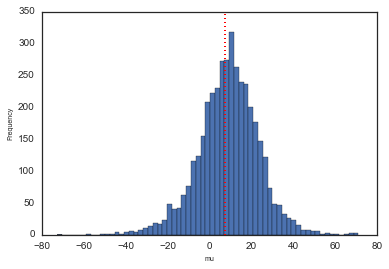

Company  5
 [-----------------100%-----------------] 50000 of 50000 complete in 26.9 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_2
Plotting sim_3
Plotting sim_1


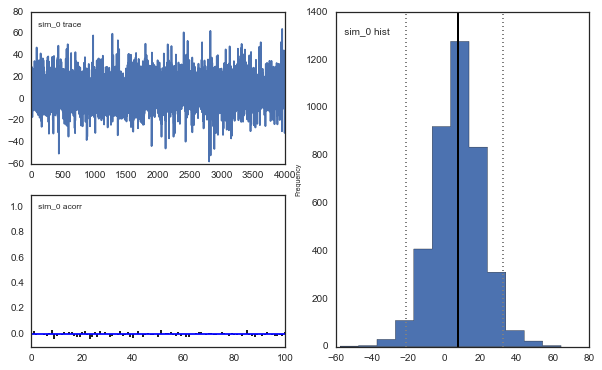

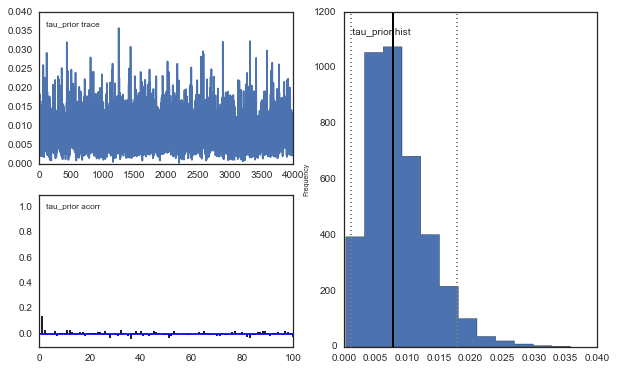

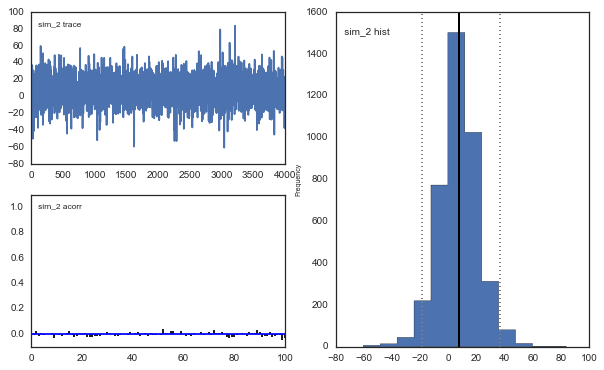

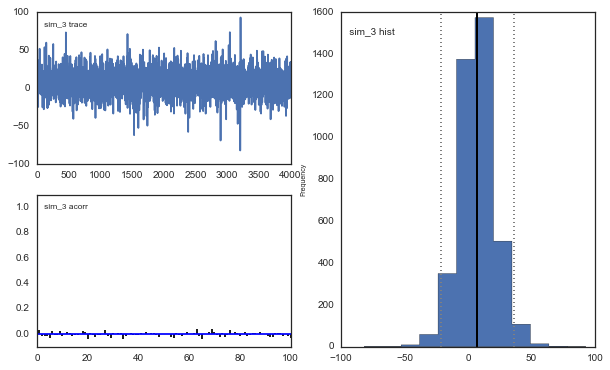

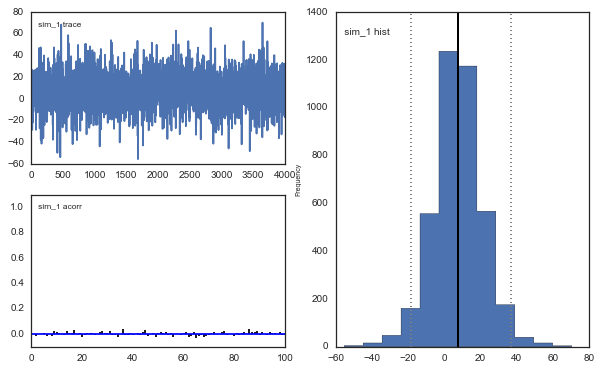

Observation for mu:  -2.1
MAP estimate for mu:  7.252399385
std of estimate for mu:  5.17956020944
Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 25.8 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_1
Plotting sim_4
Plotting sim_3
Plotting sim_2


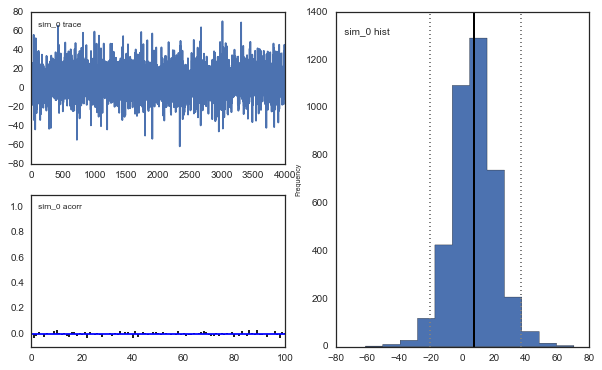

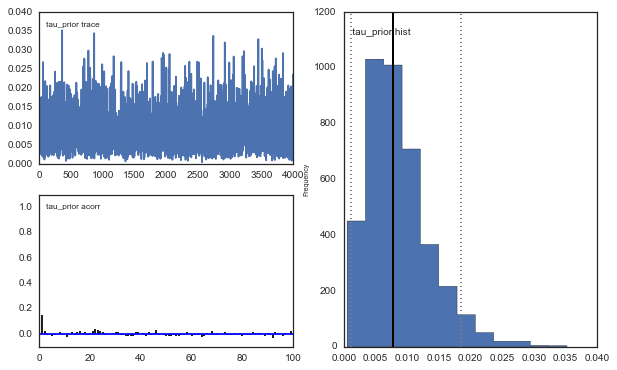

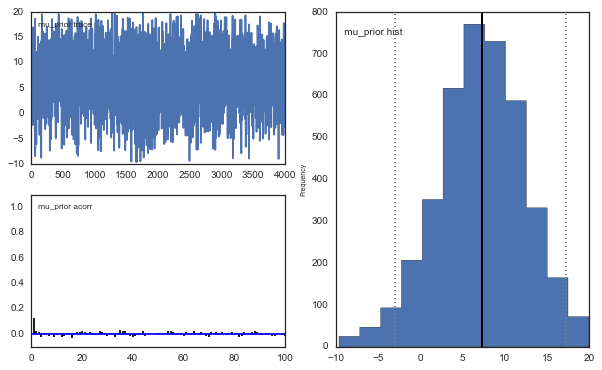

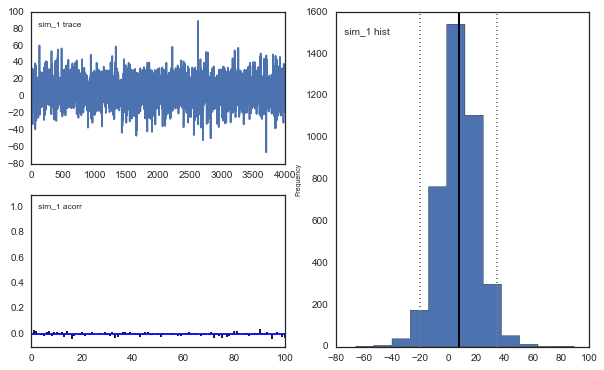

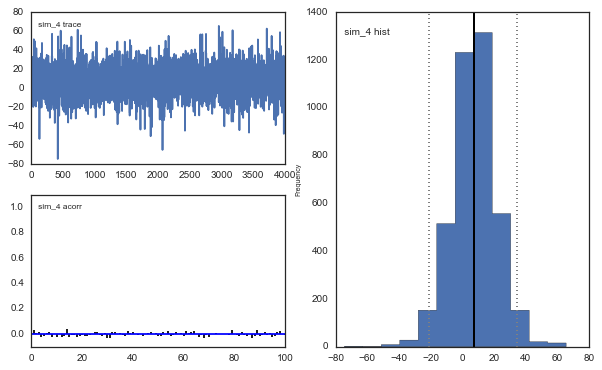

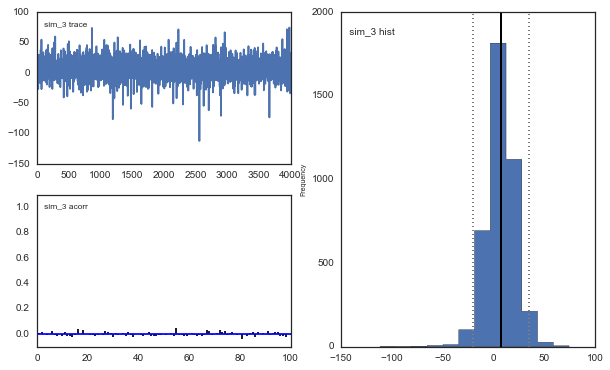

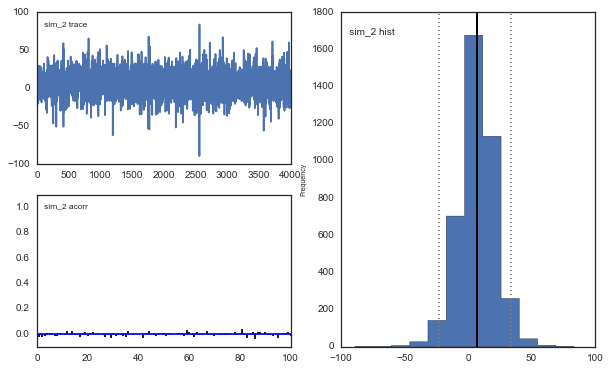

Observation for mu:  -2.1
Posterior Predictive estimate for mu:  7.16068492046
std of estimate for mu:  5.11073055915
Goodness of Fit Plot


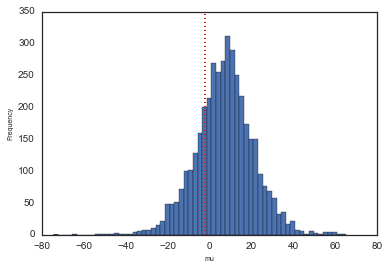

Company  6
 [-----------------100%-----------------] 50000 of 50000 complete in 28.0 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_1
Plotting sim_4
Plotting sim_3
Plotting sim_2


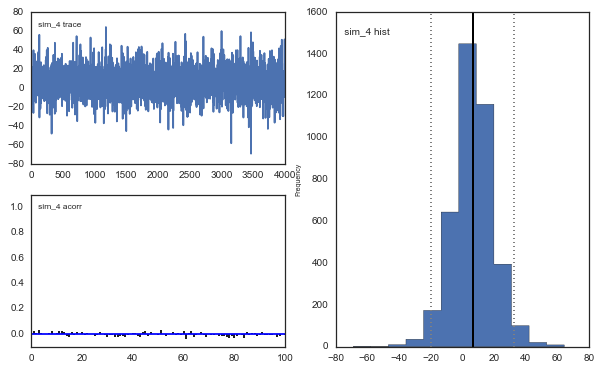

Observation for mu:  1.8
MAP estimate for mu:  6.43708408647
std of estimate for mu:  4.65660351027
Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 30.8 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_2
Plotting sim_4
Plotting sim_3
Plotting sim_1
Plotting sim_5


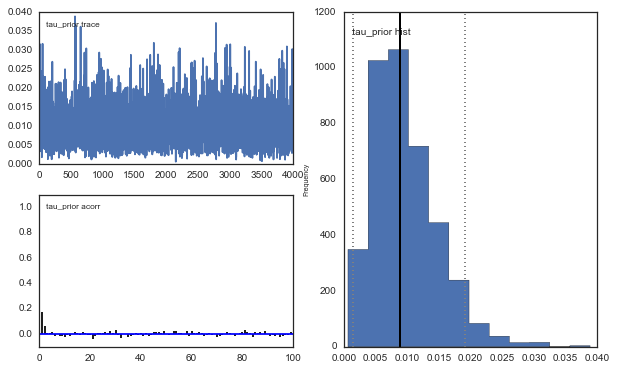

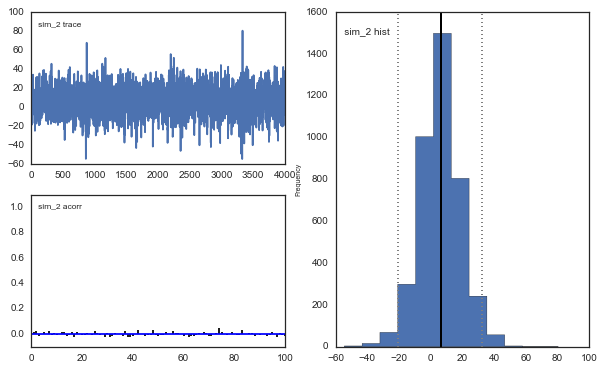

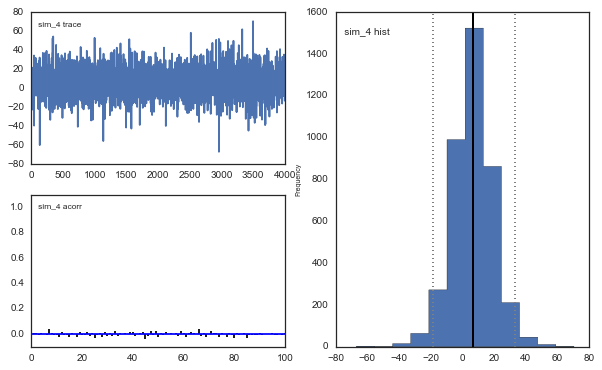

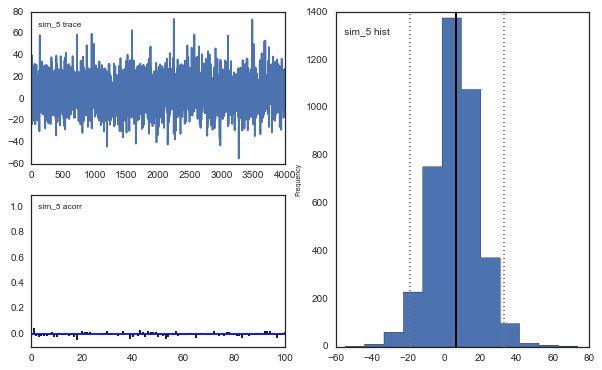

Observation for mu:  1.8
Posterior Predictive estimate for mu:  6.3912383957
std of estimate for mu:  4.66806885107
Goodness of Fit Plot


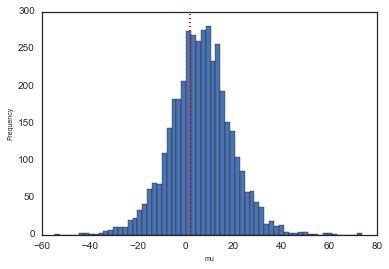

Company  7
 [-----------------100%-----------------] 50000 of 50000 complete in 32.1 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_2
Plotting sim_4
Plotting sim_3
Plotting sim_1
Plotting sim_5


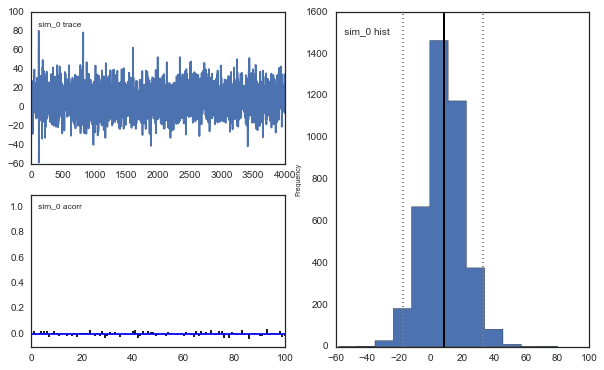

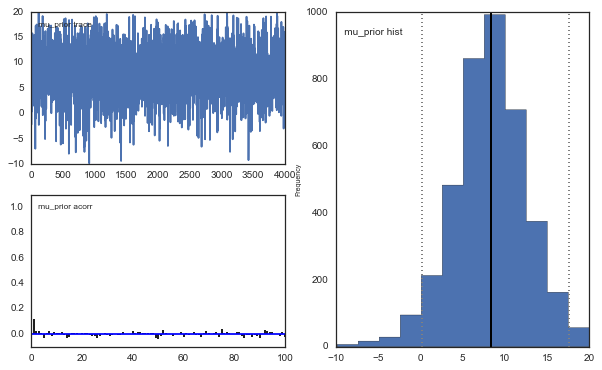

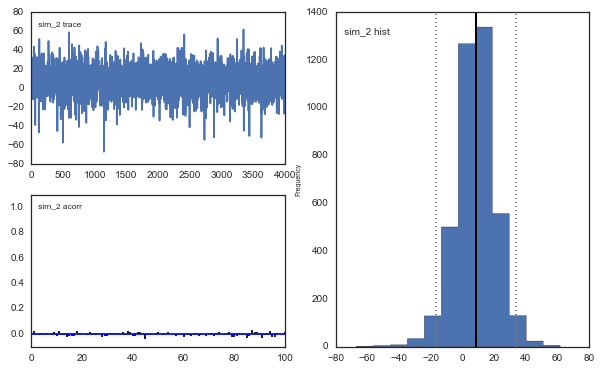

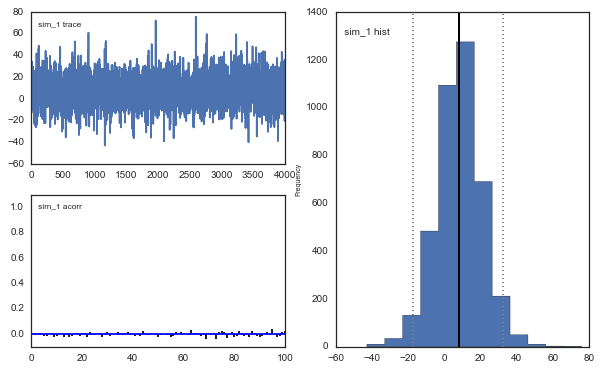

Observation for mu:  19.6
MAP estimate for mu:  8.21065201065
std of estimate for mu:  4.29815043916
Posterior Predictive Plots
 [-----------------56%-                 ] 28367 of 50000 complete in 20.0 secHalting at iteration  28722  of  50000
Plotting tau_prior
Plotting sim_4
Plotting sim_0
Plotting mu_prior
Plotting sim_2
Plotting sim_3
Plotting sim_6
Plotting sim_1
Plotting sim_5


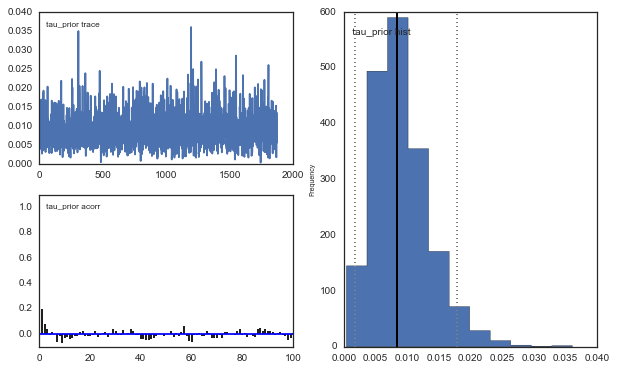

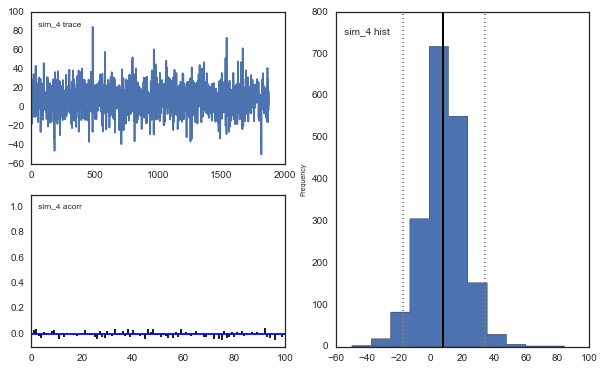

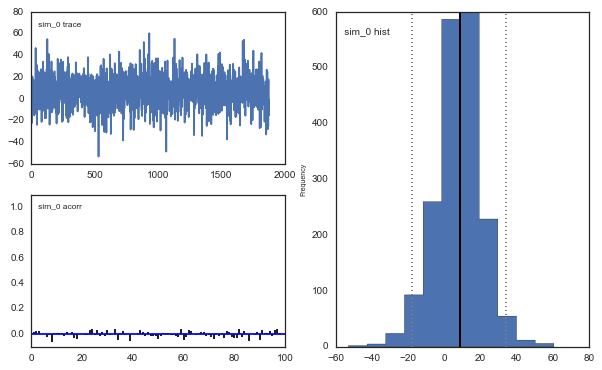

Observation for mu:  19.6
Posterior Predictive estimate for mu:  8.02788825883
std of estimate for mu:  4.25251627319
Goodness of Fit Plot


Company  8
 [-----------------100%-----------------] 50000 of 50000 complete in 38.6 secPlotting sim_0
Plotting tau_prior
Plotting mu_prior
Plotting sim_2
Plotting sim_6
Plotting sim_4
Plotting sim_3
Plotting sim_1
Plotting sim_5


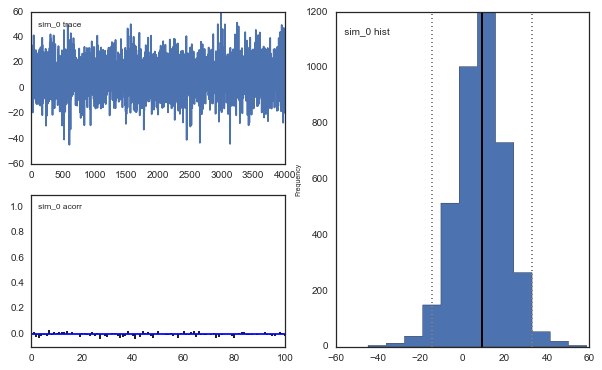

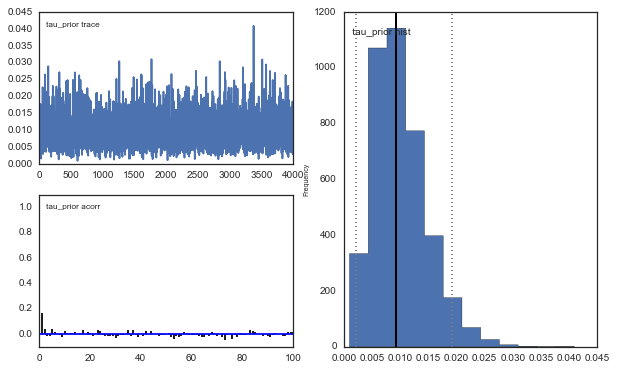

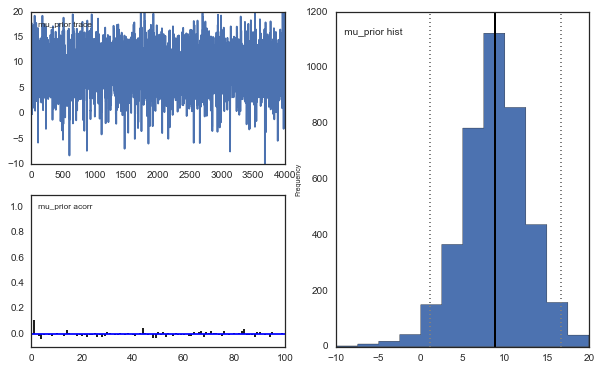

In [ ]:
tau_prior = pm.Uniform('tau_prior', lower = 0, upper = 0.05)
mu_prior = pm.Uniform('mu_prior', lower = -10, upper = 20)
for i in range(len(data_means)):
    print 'Company ', i+1
    likelihood = pm.Normal('likelihood_%d'%i, mu = mu_prior, tau = tau_prior, value = data_means[i], observed = True)
    model_cp = pm.Model([tau_prior,mu_prior, likelihood])
    M_cp = pm.MCMC(model_cp)
    M_cp.sample(iter=50000, burn=10000, thin = 10)

    # plot of variables
    pm.Matplot.plot(M_cp)
    plt.show()
    print 'Observation for mu: ', data_means[i]
    print 'MAP estimate for mu: ', np.mean(M_cp.trace('mu_prior')[:])
    print 'std of estimate for mu: ', np.std(M_cp.trace('mu_prior')[:])
    
    
    # posterior predictive
    print 'Posterior Predictive Plots'
    data_sim = pm.Normal('sim_%d'%i, mu_prior, tau_prior)
    model_cp_postpred = pm.Model([tau_prior,mu_prior, data_sim])
    M_cp_postpred = pm.MCMC(model_cp_postpred)
    M_cp_postpred.sample(iter=50000, burn=10000, thin = 10)
    pm.Matplot.plot(M_cp_postpred)
    plt.show()
    
    print 'Observation for mu: ', data_means[i]
    print 'Posterior Predictive estimate for mu: ', np.mean(M_cp_postpred.trace('mu_prior')[:])
    print 'std of estimate for mu: ', np.std(M_cp_postpred.trace('mu_prior')[:])
    
    print 'Goodness of Fit Plot'
    pm.Matplot.gof_plot(data_sim, data_means[i], name='mu')
    plt.show()

#### Partial Pooling
Assumes that the data comes from the same model. Unlike complete pooling though, here we get one weighed estimate as the mean of the 8 observations weighed by thier stds. We have one observation. However it should be better representative than the Complete pooling because it considers each observations distribution as well.

In [8]:

weighed_mean = np.sum(map(lambda tau,mu: tau**2*mu, data_std, data_means))/np.sum([tau**2 for tau in data_std])
print 'Observation from partially pooled model: ', weighed_mean

Observation from partially pooled model:  10.8242220365


 [-----------------100%-----------------] 50000 of 50000 complete in 6.6 secPlotting mu_prior_pp
Plotting tau_prior_pp


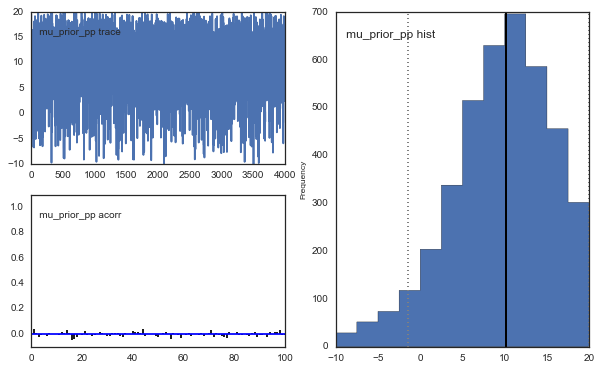

Posterior Predictive Plots
 [-----------------100%-----------------] 50000 of 50000 complete in 11.3 secPlotting mu_prior_pp
Plotting tau_prior_pp
Plotting data_sim_pp


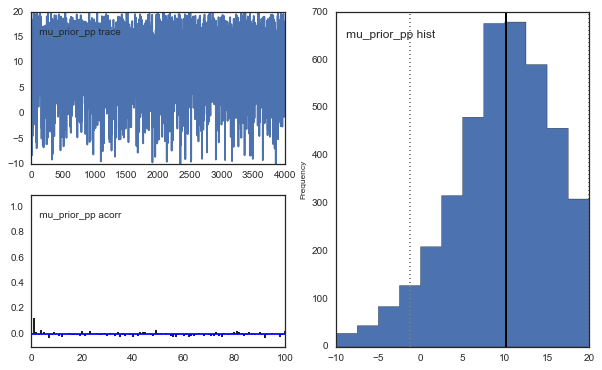

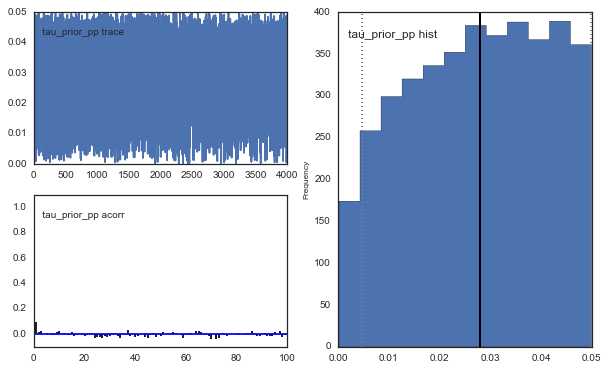

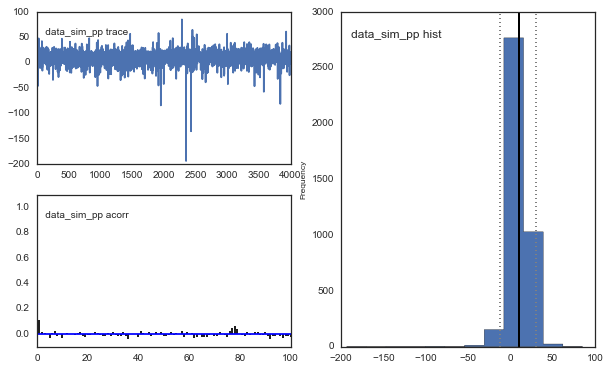

Observation for mu:  10.8242220365
Posterior Predictive estimate for mu:  9.61412620174
std of estimate for mu:  5.8569297855
Goodness of Fit


In [10]:
tau_prior_pp = pm.Uniform('tau_prior_pp', lower = 0, upper = 0.05)
mu_prior_pp = pm.Uniform('mu_prior_pp', lower = -10, upper = 20)
likelihood_pp = pm.Normal('likelihood_pp', mu = mu_prior_pp, tau = tau_prior_pp, value = weighed_mean, observed = True)

model_pp = pm.Model([tau_prior_pp,mu_prior_pp, likelihood_pp])
M_pp = pm.MCMC(model_pp)
M_pp.sample(iter=50000, burn=10000, thin = 10)

# plot of variables
pm.Matplot.plot(M_pp)
plt.show()

# posterior predictive
print 'Posterior Predictive Plots'
data_sim_pp = pm.Normal('data_sim_pp', mu_prior_pp, tau_prior_pp)
model_pp_postpred = pm.Model([tau_prior_pp,mu_prior_pp, data_sim_pp])
M_pp_postpred = pm.MCMC(model_pp_postpred)
M_pp_postpred.sample(iter=50000, burn=10000, thin = 10)
pm.Matplot.plot(M_pp_postpred)
plt.show()

print 'Observation for mu: ', weighed_mean
print 'Posterior Predictive estimate for mu: ', np.mean(M_pp_postpred.trace('mu_prior_pp')[:])
print 'std of estimate for mu: ', np.std(M_pp_postpred.trace('mu_prior_pp')[:])
 
print'Goodness of Fit'

pm.Matplot.gof_plot(data_sim_pp, weighed_mean, name='mu')
plt.show()

# Problem 2: Motif Finding Using Gibbs

One interesting problem in bioinformatics is that of finding common subsequences of nucleotid bases (these subsequences are called motifs) that repeat themselves within larger DNA sequences. The problem is relevant for genetics because locating the positions of these motifs within the DNA sequence helps in the understanding of how genes are regulated.

Suppose that you are a biologist who is analyzing genetic material collected in a nearby asteroid. The DNA of this extraterrestrial form of life is formed as a sequence of $n_B = 5$ nucleotide bases. Let us label these extraterrestrial nucleotides and put them in a vector $\mathbf{b} = [\rm{M}, \rm{0}, \rm{2}, \rm{A}, \rm{7}]$. You have a DNA sample $\mathcal{S}$ consisting of $p=20$ sequences of DNA, each of them with a lenght $l=200$ nucleotide bases that you can find in <a href="HW3/Sequences_new.dat">this file</a>. Each row of the file is a DNA sequence. You are asked to find a motif of $q = 5$ consecutive nucleotides hidden in the background that appears to repeat itself very often in the DNA you were given, but that appears only once in each of the sequences.

Let us formalize the problem. The starting positions of the motif within each sequence (our missing data in the problem) can be represented by the set of random variables:

$$
\mathcal{A} = \left\{a_k, k = 1,...,p\right\}
$$

The motif has to start somewhere within the sequences and so for each sequence $\mathcal{S_k}$:

$$
\sum_{i=1}^{l}P(a_k=i) = 1
$$

What we are after is the joint distribution $P(\mathcal{A}|\mathcal{S})$ for the motif alignment (i.e., its starting position) being $a_k$ for sequence $\mathcal{S}_k$. As shown in [this paper](http://www.cs.cmu.edu/~epxing/Class/10810/readings/liu.pdf), for each sequence $\mathcal{S}_k$ (think of each sequence as a dimension of our parameter space) we can obtain the conditional probability: 

$$
P(a_k=i|\mathcal{A_{\hat{k}}},\mathcal{S})=\frac{1}{Z}\prod_{j=1}^q\left(\frac{\mathbf{\hat{\theta}_j}}{\mathbf{\hat{\theta}_0}}\right)^{s_{i+j-1}}
$$

where $\mathcal{A_{\hat{k}}}$ refers to the alignments in all sequences other than $\mathcal{S}_k$, and $Z$ is a normalization factor. Of the other quantities, $s_x$ is a vector index for the *x-th* position in the sequence, with the same length as $\mathbf{\hat{\theta_j}}$ and $\mathbf{b}$. It takes a value of 1 at the entry that in $\mathbf{b}$ corresponds to the base at position $x$ and 0 for all other entries. Finally, vectors $\mathbf{\hat{\theta_j}}$ and $\mathbf{\hat{\theta_0}}$ contain respectively the probabilities of observing the $q$ bases at the corresponding position of the current sequence, and the probabilities of finding the same bases in the background. It is important to note that the power, division, and multiplication of vectors in the equation above is performed entry-wise.

Your only task is to design a Gibbs algorithm that samples the joint probability $P(\mathcal{A}|\mathcal{S})$. Your algorithm should converge and provide the alignments of the motif and the secret motif itself. Here are some hints/tasks that should help you and that will help the TF grading your homework:

#### (a) Describe the equation for the conditional probabilities in your own words, and make sure you understand it before you code anything. Be as explicit as possible.



#### answer
The conditional probability basically represents the odds ratio, or the likelihood of observing the $q$ bases at the given 5-positions in the sequence (the potential motif) in all remaining sequences over the likelihood of observing them by chance; background probabiliites. So for a given motif, we condition on the starting sites in the 19 remaining sequences. We move across the sequence of interest, changing the start site by 1 in each iteration, and calculating the conditional for this new start site. In the end we should have a list of conditional probabilities, from which we could sample to get the most likely repeating sequence (the motif). This is sampling from the posterior. We update the start site on this sequence and choose another sequence to hold aside and repeat the calcluation on. In the end, it converges to 'AM207'!



#### (b) Start by assigning random starting positions for the $q$-long motif in all sequences. Then exclude a particular sequence $S_k$ (your current sequence) and use the remaining sequences to construct $\mathbf{\Theta}$ as a probability matrix from counting the number of times that the *i-th* base appears in position $j$ of the motif given the current alignments. Construct also a vector $\mathbf{\hat{\theta_0}}$ from counting the number of times that the *i-th* base appears in the background. Note that the vectors $\mathbf{\hat{\theta_j}}$ are the columns of matrix $\mathbf{\Theta}$.



#### (c) From $\mathbf{\Theta}$ and $\mathbf{\theta_0}$, derive the conditional probability over all possible alignments for your current sequence and draw a sample from it. This sample will be your updated alignment for the current sequence.


#### (d) Iterate over all $p$ sequences. Such iteration over sequences is only one Gibbs iteration. After enough Gibbs iterations you should start noticing that the algorithm has converged.

In [20]:
with open('HW3/Sequences_new.dat') as f:
    content = f.readlines()
S = [seq.replace("\n", "").strip() for seq in content] 
q = 5


In [45]:
def get_profile(possible_motifs):
    counts_all = []
    for j in range(len(possible_motifs[0])):
        counts_j = {'M':0.01,'0':0.01,'2':0.01,'A':0.01,'7':0.01}
        for motif in possible_motifs:
            counts_j[motif[j]] +=1
        counts_all.append(counts_j)
        # index of counts_all refers to the j'th position of the motif
        # elements in counts_all are dict with the counts for all 5 bases
    return counts_all

def get_background(possible_motifs):
    background = {'M':0.01,'0':0.01,'2':0.01,'A':0.01,'7':0.01}
    for j in range(len(possible_motifs[0])):
        for motif in possible_motifs:
            background[motif[j]] +=1
    return background 

def get_theta(motif,bp_freqs_per_site):
    likelihood = 1
    for j in range(len(motif)):
        likelihood = likelihood*(bp_freqs_per_site[j][motif[j]]/19.0)
    return likelihood
    
def get_theta_0(motif, background_freq):
    likelihood = 1
    for j in range(len(motif)):
        likelihood = likelihood*background_freq[motif[j]]
    return likelihood
    


In [70]:
def gibbs(A,S,q):

    # loop through the seuqneces
    for i in range(len(S)):
        possible_motifs = [x[j : j + q] for k, (x, j) in enumerate(zip(S, A)) if k != i]
        bp_freqs_per_site = get_profile(possible_motifs) #list of dict
        background_freq = get_background(possible_motifs) #dict

        # get conditional probability over all alignments
        conditionals = []
        normalization_factor = 0
        for j in xrange(len(S[i]) - q + 1):
            motif_window = S[i][j : j + q]
            theta = get_theta(motif_window,bp_freqs_per_site)
            theta_0 = get_theta_0(motif_window, background_freq)
            conditional = theta/ theta_0
            conditionals.append(conditional)
            normalization_factor += conditional
        normalized = map(lambda x: x/normalization_factor, conditionals)
        # sample new motif start site
        A[i] =stats.rv_discrete(values = (range(len(normalized)),normalized)).rvs()
    return A, [x[j : j + q] for x, j in zip(S, A)]

In [76]:
# start with random indices for motif start sites
A = [np.random.randint(0, len(S_k) - q) for S_k in S]

for i in range(2000):
    A, motif = gibbs(A,S,q)
    if i%500 == 0:
        print 'iteration', i
        print A
        print motif

iteration 0
[131, 19, 29, 56, 132, 63, 15, 9, 79, 87, 131, 56, 28, 30, 131, 168, 123, 82, 179, 160]
['20M2A', '7M027', '2AM20', 'A0720', 'MMMMA', '70M2A', 'AA720', '0MM70', 'A7220', '70720', '00200', 'AAM2A', 'MM22A', 'AM707', 'AA207', 'M7222', '0A700', 'M7727', '2077A', '2A20A']
iteration 500
[62, 150, 30, 153, 26, 57, 51, 97, 70, 154, 37, 124, 61, 85, 165, 124, 84, 144, 44, 88]
['AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207']
iteration 1000
[62, 150, 30, 153, 26, 57, 51, 97, 70, 154, 37, 124, 61, 85, 165, 124, 84, 144, 44, 88]
['AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM207']
iteration 1500
[62, 150, 30, 153, 26, 34, 51, 97, 70, 154, 37, 124, 61, 85, 165, 124, 84, 144, 44, 88]
['AM207', 'AM207', 'AM207', 'AM207', 'AM207', 'AM

# Problem 3: Optimizing Hand Luggage

You are going on a trip and have to optimize your hand luggage, but thanks to your cheap flight ticket, the weight of the hand lugagge is restricted and you are sure the airline will enforce the upper limit. You have a set of presents that you want to bring to the relatives you are visiting, but you have to notice that they don't all fit into your suitcase. 

This problem is also called the knapsack problem: given a set of items, each has its weight and value, determine which items should be included into your suitcase, so that the total weight does not exceed some value $W$ and the total value is maximal. The kind of the knapsack problem when each item can be included into the collection at most once is called the 0/1 knapsack problem. Your task is to solve this problem using simulated annealing. 

Implement simulated annealing to solve this problem with the list of items below. Which ones would you pick for your suitcase? Plot and discuss your optimization scheme and results. 
Compare your solution to a greedy algorithm, which sorts the items by the ratio $\frac{v_i}{w_i}$ and puts them into the suitcase consecutively.

In [11]:
# here is your data:

#number_of_data_points
N = 100

#total_weight_limit 
W = 3000

# weight of all the different items
w = np.array([  38,  236,  909,   73,  768,  906,  716,  646,  848,  961,  145,
        130,  973,  584,  750,  509,  391,  282,  179,  277,  255,  358,
        915,  469,  908,  253,  491,  669,  926,  399,  563,  581,  216,
        984,  754,  504,  479,  865,   87,  142,  394,    8,  320,  830,
        535,  314,  514,  897,  317,  210,  265,  729,  654,  628,  432,
        634,  457,  543,   72,  388,  455,  918,  562,  314,  516,  965,
        793,  498,   44,  589,   27,  821,  337,  622,  884,  298,  467,
         16,   65,  197,   26,  368,  739,  472,  904,  283,  666,  617,
         23,  778,  708, 1000,  127,  280,  382,  357,  156,  934,  314,
        596])

# value of all different items
v = np.array([36, 38, 30, 32, 40, 45, 45, 37, 49, 40, 44, 30, 31, 47, 43, 33, 30,
       43, 36, 50, 36, 32, 42, 41, 37, 43, 38, 41, 42, 41, 50, 34, 37, 37,
       43, 34, 46, 48, 30, 43, 40, 47, 37, 40, 50, 30, 42, 31, 39, 48, 49,
       31, 32, 42, 37, 32, 40, 30, 39, 48, 36, 32, 37, 37, 46, 45, 35, 47,
       40, 50, 46, 35, 43, 47, 48, 31, 50, 40, 30, 37, 30, 49, 47, 44, 43,
       50, 50, 41, 36, 43, 45, 39, 32, 37, 35, 34, 35, 38, 43, 47])

Implement simulated annealing to solve the knapsack problem

In [12]:
# calculate the value of an assortment
def value(solution, item_values):
    value = np.sum([a*b for a,b in zip(solution,item_values)])
    return value 

# calculate the weight of the assortment
def weight(solution, item_weights):
    weight = np.sum([a*b for a,b in zip(solution,item_weights)])
    return weight

# returns prob of accepting: 
# Probability of acceptance P = min(1, exp(beta*delta))
# delta is V' - V and beta = 1/kT, where k is a constant and T is temperature
def accept_prob(old_value, new_value, T):
    delta_v = new_value - old_value
    beta = 1.0/T
    p_accept = min(1,np.exp(beta*delta_v))
    return p_accept 
    

def neighbor(solution, item_weights, W):

    # pick an item at random to try adding to the bag
    suggested_solution = solution
    item_to_pick = 1
    # repeat until you find an item you didn't add yet (a 0)
    while item_to_pick == 1:
        pick = np.random.randint(0,len(suggested_solution))
        item_to_pick = suggested_solution[pick]
    suggested_solution[pick] +=1
    
    # check if bag crosses the upper limit
    while weight(suggested_solution, item_weights) > W:
        # if it does: repeadetly choose an item to remove from the bag (including 
        # the item just picked) until the sum of the weights < W_max
        item_to_remove = 0
        # repeat until you find an item in your bag (a 1)
        while item_to_remove == 0:
            remove = np.random.randint(0,len(suggested_solution))
            item_to_remove = suggested_solution[remove]
        suggested_solution[remove] -=1
        
    # now we have a new trial assortment E_i' to return
    star_solution = suggested_solution
    return star_solution
    
def anneal(solution,item_values, item_weights, W, alpha):
    # get value of the old assortmnet 
    old_value = value(solution,item_values)
    T = 500.0
    T_min = 0.00001
    # list to plot 
    values = []
    
    while T > T_min:
        i = 1
        while i <= 100:
            new_solution = neighbor(solution, item_weights, W)
            new_value = value(new_solution,item_values)
            ap = accept_prob(old_value, new_value, T)
            # with probability P, accept the new assortment E_i+1 = E_i'
            # otherwise remain at the old assortment E_i+1 = E_i
            if ap > np.random.random():
                solution = new_solution
                old_value = new_value
            values.append(old_value)
            i += 1
        T = T*alpha
    return (solution, values)


In [13]:
# assortment of objects E_i = (x_1....x_n) where x_i = 0 or 1 (item in bag) 
# intiial assortment E_0 = (0,0,0...) where no item is in the bag
E_0 = np.zeros(len(w))
# initial weight of the bag is W=0
W_0 = 0
# annealing factor, we decrease temperature by thsi factor
alpha = 0.88
solution, values = anneal(E_0,v, w, W, alpha)
print len(values)

13900


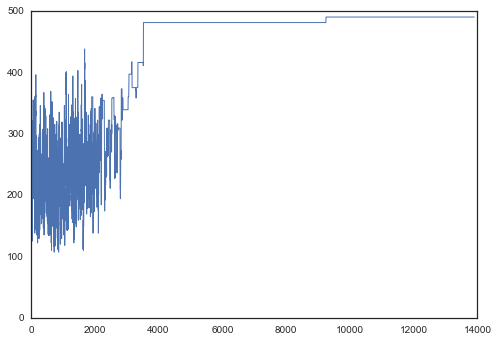

In [14]:
plt.plot(values, linewidth = 1)

Plot and discuss your optimization scheme and results. 


In [15]:
print 'SA sum of item weights: ', weight(solution,w)
print 'SA sum of item values: ', value(solution,v)

SA sum of item weights:  2480.0
SA sum of item values:  178.0



### Practical Choices

*  Start with temperature $c_0$ large enough to accept all transitions.
*  Lowering temperature schedule (thermostat). Common choices are
    1. Linear: Temperature decreases as  $c_{k+1} = \alpha c_k$. Typical values are $0.8 < \alpha < 0.99$
    2. Exponential: Temperature decreases as $0.95^{{\rm iteration}}$
    3. Logarithmic: Temperature decreases as $1/\log({\rm iteration})$
* Reannealing interval is the number of points to accept before reannealing (change the temperature). Typical value is 100
* Stopping criterion
    1. Max iterations bounds the number of iterations the algorithm takes
    2. Function tolerance. The algorithm stops if the average change in the objective function after  $m$ iterations (typical $m=100$) is below user specified tolerance
    3. Objective limit. The algorithm stops if the objective function goes below some value  
* Transition jumps, $L$ a.k.a. Annealing function
    1. Fast annealing takes random steps, with size proportional to temperature
    2. Boltzmann annealing takes random steps, with size proportional to square root of temperature


Compare your solution to a greedy algorithm, which sorts the items by the ratio $\frac{v_i}{w_i}$ and puts them into the suitcase consecutively.

In [16]:
import operator

item_ratios = [1.0*a/b for a,b in zip(v,w)]
item_ratios_dict = {i:item_ratios[i] for i in range(len(item_ratios))}
sorted_item_ratios = sorted(item_ratios_dict.items(), key=operator.itemgetter(1), reverse = True)
weight = 0
value = 0 
for item in sorted_item_ratios:
    index = item[0]
    weight += w[index]
    value += v[index]
    if weight > W:
        weight -= w[index]
        value -= v[index]
        break
print 'deterministic sum of item weights: ', weight
print 'deterministic sum of item values: ', value


deterministic sum of item weights:  2806
deterministic sum of item values:  897


# Problem 4: Confusing Classifications

You are a graduate student conducting research in image processing.  You want to test out your latest algorithm, which you decide to call "Ultra-Multilayer Hierarchical Super Convolutionary Neural Network."  However, in order to test out your algorithm, you need a sizable training data set. Luckly, your advisor has generously given you over 10 GB of over one million stock photos of cats and dogs.  Unfortunately, none of the images are labelled.  Fantastic!  You enjoy looking at photos of puppies and kittens in your spare time anyways so you decide to dedicate this entire weekend to labeling all of them. 

<table>
<tr>
 <td><img src="HW3/cat.jpeg" width=150>
 </td>
 <td><img src="HW3/dog.jpeg" width=150>
 </td>
</tr>
</table>

However, after spending two hours looking over hundreds of images, these puppies and kittens are no longer looking so cute.  In fact, you are starting to get disgusted at the idea of looking at another picture of these furry creatures.  

At this time, you decide to tap into the "power of the crowd" by farming out the labeling task to the workers of Amazon Mechanical Turk (MTurk). You decide to hire 3 MTurk workers.  However, you're not sure if these workers are reliable. So, how can you quantify the competency of the workers? In this problem you will develop a model to access the general difficulty of labeling the images of your two classes. 

Classifying items in general can be hard even for humans.  Some items just look alike, even if they actually are from two different classes. The difficulty in categorizing items of a specific class in relation to other classes is summarized by a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

$$ \Theta = \left( 
\begin{array}{cc}
1.0 & 0.0 \\
0.5 & 0.5
\end{array}
\right ) $$

This confusion matrix indicates that items of class 1 are very easy to classify, and always correctly labeled, whereas items of class 2 are very hard to classify and labels are basically just random guesses between the two possibilities. 

The models we discussed so far in homework and lecture were pretty low in dimensions. This problem is going to show you that the number of dimensions can grow very fast for some models, making a good sampling strategy crucial. We will only be able to explore a very minimal version of the problem, because of our limited computational resources, but it should be immediately clear how this model would scale for a greater number of classes, workers, and/or items.

Develop a Bayesian model that takes as input a set of (possible erroneous) item labelings and infer the underlying confusion matrix and the true label each data point. To make the model manageable by your laptop, use only one underlying confusion matrix (in principle different people could have different difficulties) two classes for the labels (the confusion matrix is 2x2), and a maximum of 150 data points. 

The model you are after is displayed in the following dependency graph:
<img src="HW3/confusion_model.png" alt="confusion matrix model" width=300>


$$\rho \sim Dir(\alpha) $$

$$z_i \sim Multinomial(\rho)$$

\begin{equation}
\Lambda = \begin{bmatrix}
 \lambda_1 \\
 \lambda_2 \\
\end{bmatrix}
\end{equation}

$$\Theta_{(k,:)} \sim Dir(\lambda_k)$$

$$r_{i,j} \sim Multinomial(\Theta_{(z_i , : )}), \ \forall j \in \{1,...,J\}$$

You're given reports generated by the 3 workers, so $r_{i,1}$ is one label for item $r_i$ and $r_{i,2}$ is another label given from another worker. Note that if the confusion matrix is not the identity matrix then these labels can be different because the workers make mistakes. The arrows in the diagram indicate dependence. So the labelings you observe are dependent on the confusion matrix $\Theta$ and the underlying true label $z_i$ for each item. $N$ is the number of data points you have and as described above you should use $N \leq 150$.

You can see from the diagram that the model uses Multinomials with Dirichlet priors. 

#### Start by describing the model in terms of these distributions, what they mean and what this arrangement means for the form of the labels $z_i$. Discuss the meaning and influence of the hyperparameter $\alpha$ on the true labels of the data.


#### Answer: ####
The multinomial distribution is a good choice for $z_i$ because we have k=2 labels and n=1 data point. The dirichlet distribution is the conjugate prior of the multinomial distribution. So it is a good choice for the hyperparametes of $z_i$. Here the hyperparameters are a vector $\rho = (\rho_c, \rho_d)$ corresponding to the probability that a given picture is a cat or a dog. Since we do not know anything about the labelled set, we cannot tell if one class is more dominant than the other. So, we want to have some flexibility in setting the values $\rho_c$ and $\rho_d$. To get this we  set concentration parameters vector $\alpha = (\alpha_c, \alpha_d)$:
1. with equal values for $\alpha_c$ and $\alpha_d$ instead of different values- so that the distribution of $\rho$ is symmetric.
2. $\alpha= [1,1]$ or values $>1$ but relatively small. This tells the model that our confidence in $\rho$ values is limited and we would like to sample from a range of values as opposed to favor one value or the other.

The examples below show:
1. $\alpha = [0.01 ,0.01]$: As $\alpha$ approaches zero, the model predicts with confidence one class is dominant over the other, $\rho_c \approx 0$ and $\rho_d \approx 1$ or vice versa. 
2. $\alpha = [1 ,1]$: Results in a uniform, flat distribution for $\rho$, so it is like setting an uninformative prior on $\rho$.
3. (and 4): As $\alpha$ approaches large values, the model predicts with increasing confidence that the classes are equally likely: $\rho_c \approx \rho_d \approx 0.5$.

 [-----------------100%-----------------] 10000 of 10000 complete in 2.4 sec

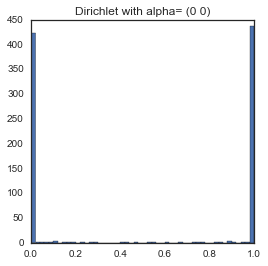

 [-----------------100%-----------------] 10000 of 10000 complete in 2.5 sec

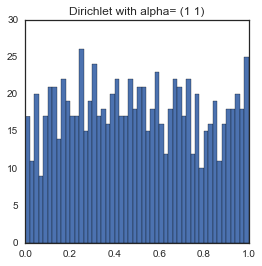

 [-----------------100%-----------------] 10000 of 10000 complete in 2.4 sec

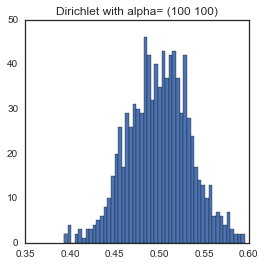

 [-----------------100%-----------------] 10000 of 10000 complete in 2.6 sec

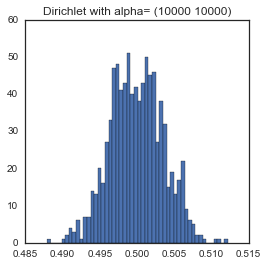

In [153]:
alphas = [[0.01,0.01],[1,1],[100,100],[10000,10000]]
for alpha in alphas:
    plt.figure(figsize=(4,4))
    rho = pm.Dirichlet(name = 'rho', theta = alpha)
    M = pm.MCMC(set([rho]))
    M.sample(iter=10000, burn=1000, thin=10)
    plt.hist(M.trace('rho')[:], bins= 50)
    plt.title('Dirichlet with alpha= (%d %d)'%(alpha[0], alpha[1]))
    plt.show()




#### Discuss your selection of the hyperparameter $\Lambda$ and how that influences the confusion matrix $\Theta$.


#### Answer 
Consider a data point that is actually a cat. The person-j label $r_{ij}$ is multinomial with parameters $\theta_{cc}, \theta_{cd}$, corresponding to the probability a cat is labelled as a cat, and a cat is labelled as a dog, respectively. Since it should be relatively easy to tell apart cats from dogs, we expect that the probabilities $\theta_{cc} \approx 1$ and $\theta_{cd} \approx 0$. The reverse is true if the considered data point is actually a dog: $\theta_{dc} \approx 0$ and $\theta_{dd} \approx 1$. These vectors  $(\theta_{cc}, \theta_{cd})$ and  $(\theta_{cc}, \theta_{cd})$ are the row vectors in the confusion matrix, $\Theta$. Each vector is a dirichlet distribution, parametrized by the concentration parameters, $\lambda_c$ and $\lambda_d$ respectively. The values of these parameters reflect the certainty in classification. It should be relatively easy to tell cats from dogs, so we set $\lambda_c$ and $\lambda_d $ to:

1. $\lambda_c$ and $\lambda_d$ are both vectors with different values, so that the dirichlet distribution is skewed in favor of one class. 
2. concentration parameters of $\lambda_c$ are the reverse of $\lambda_d$ , so once favoring cats, the other, favoring dogs.
3. values of the concentration parameters should be $<1$ so that the resulting probabilities in $\lambda_c$ and in $\lambda_d$ are close to 0,1 and 1,0 as opposed to 0.5,0.5 and 0.5,0.5.

So we set $\lambda = $ [5 1,1 5]


#### Implement this Bayesian model and sample from the posterior to recover the underlying confusion matrix $\Theta$ and the distribution of the true labels $\rho$.  Note: $\Theta$ is shared by all three workers.

In [34]:
# Here is your data

reports = np.load("HW3/reports.npy")
print reports.shape

(150, 3, 2)


 [-----------------100%-----------------] 50000 of 50000 complete in 28.1 secPlotting confusion_1_0
Plotting confusion_full_1_0_0
Plotting confusion_full_1_0_1
Plotting confusion_full_0_0_0
Plotting confusion_full_0_0_1
Plotting confusion_0_0


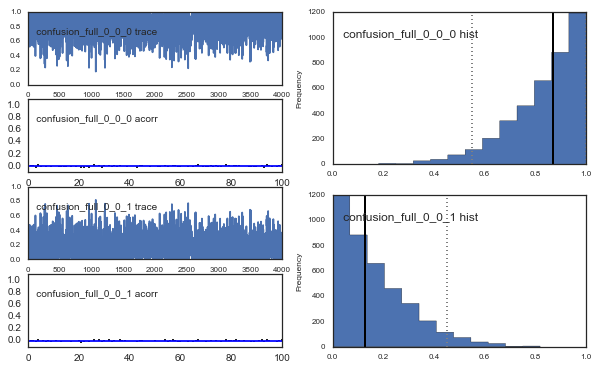

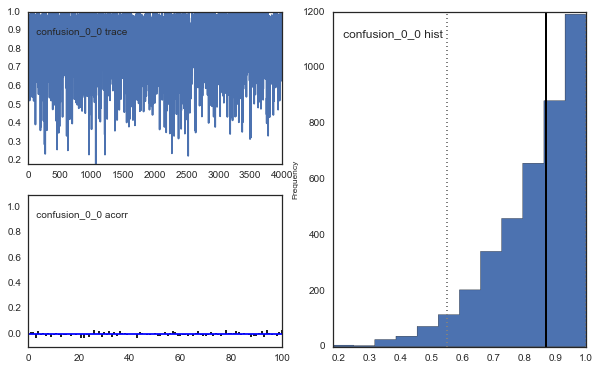

estimate for confusion matrix row 0:  0.5
estimate for confusion matrix row 1:  0.5


In [68]:
# hyperparameters for the true labels
alpha = [1,1]
rho = pm.Dirichlet('rho', theta = alpha)
rho_full = pm.CompletedDirichlet('rho_full', rho)

# 150 true label RVs
true_labels = pm.Container([pm.Multinomial('true_label_%i'%i,n=1,p=rho_full) for i in range(150)])

# confusion matrix
lamda = [[5,1],[1,5]]
confusion = pm.Container([pm.Dirichlet('confusion_%i'%i, theta = lamda[i]) for i in range(2)]) 
confusion_full = pm.Container([pm.CompletedDirichlet('confusion_full_%i'%i, confusion[i]) for i in range(2)])  
# get one estimate for the confusion matrix to use in the liklihood function
model = pm.Model([confusion,confusion_full])
M = pm.MCMC(model)
M.sample(iter=50000, burn=10000, thin = 10)
pm.Matplot.plot(M)
plt.show()
print 'estimate for confusion matrix row 0: ', np.mean(M.trace('confusion_full_0')[:])
print 'estimate for confusion matrix row 1: ', np.mean(M.trace('confusion_full_1')[:])


In [69]:
# likelihood of observed classifications (450 RVs)
@pm.observed
def likelihood(value = reports, z = true_labels, theta = [[0.85,0.15],[0.15,0.85]] ):
    likelihood = 0
    n_examples = value.shape[0] #150
    n_mturks = value.shape[1] #3
    for i in range(n_examples):
        for j in range(n_mturks):
            # index of row in confusion matrix based on the true label 
            idx = np.argmax(z[i]) 
            # label for example i by clssifier j = 0 or 1
            label = int(value[i][j][idx])
            # probability of getting the label correct from confusion matrix
            prob = theta[idx]
            likelihood += pm.multinomial_like(x= label,n=1, p=prob)
    return likelihood
        

error: (k==shape(p,1)) failed for hidden k: multinomial:k=1

 [-----------------100%-----------------] 1000 of 1000 complete in 14.1 secPlotting true_label_148_0_0
Plotting true_label_148_0_1
Plotting true_label_116_0_0
Plotting true_label_116_0_1
Plotting true_label_16_0_0
Plotting true_label_16_0_1
Plotting true_label_110_0_0
Plotting true_label_110_0_1
Plotting true_label_109_0_0
Plotting true_label_109_0_1
Plotting true_label_39_0_0
Plotting true_label_39_0_1
Plotting true_label_20_0_0
Plotting true_label_20_0_1
Plotting true_label_0_0_0
Plotting true_label_0_0_1
Plotting true_label_95_0_0
Plotting true_label_95_0_1
Plotting true_label_36_0_0
Plotting true_label_36_0_1
Plotting true_label_13_0_0
Plotting true_label_13_0_1
Plotting true_label_126_0_0
Plotting true_label_126_0_1
Plotting true_label_86_0_0
Plotting true_label_86_0_1
Plotting true_label_115_0_0
Plotting true_label_115_0_1
Plotting true_label_129_0_0
Plotting true_label_129_0_1
Plotting true_label_90_0_0
Plotting true_label_90_0_1
Plotting true_label_98_0_0
Plotting true_label_98

KeyboardInterrupt: 

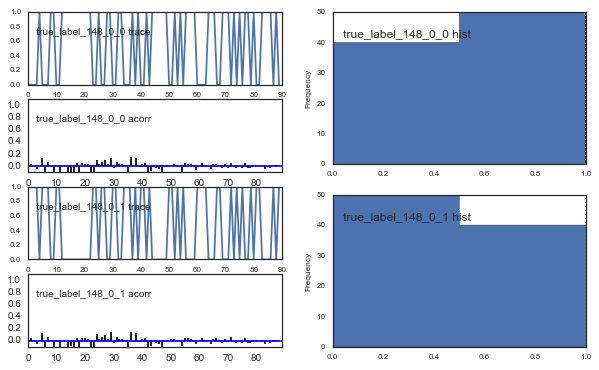

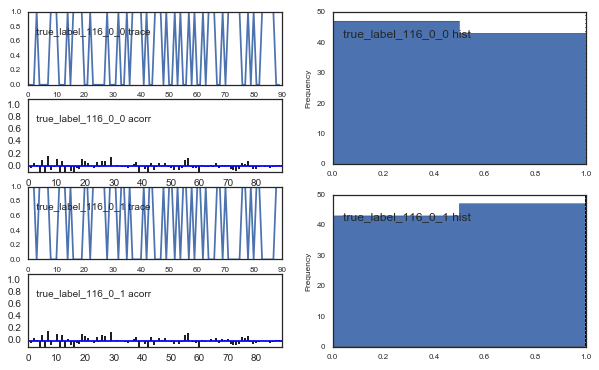

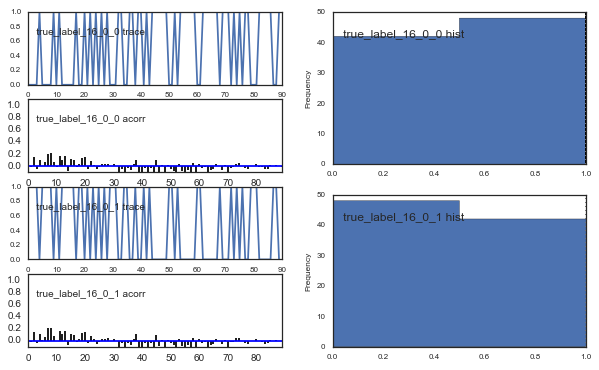

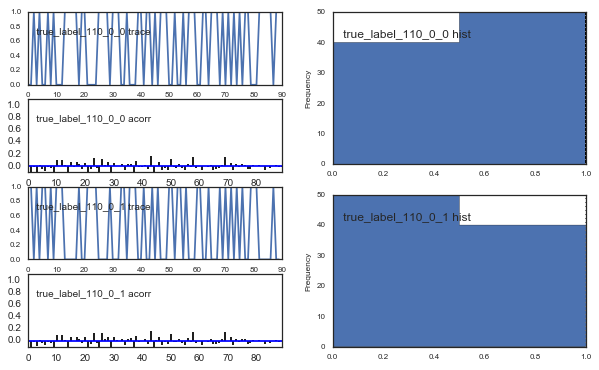

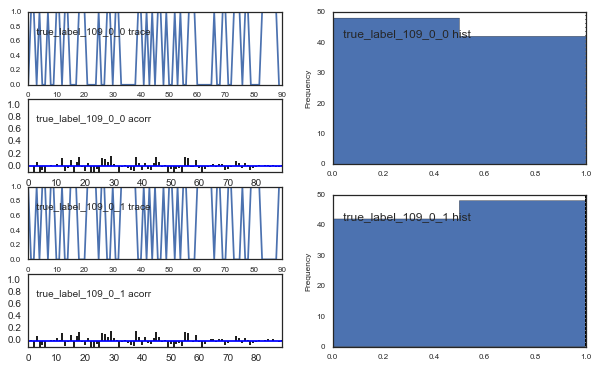

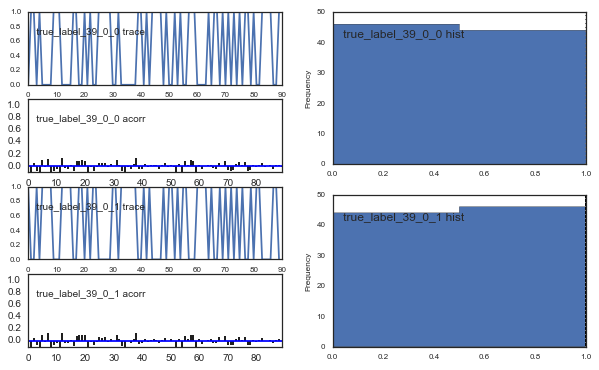

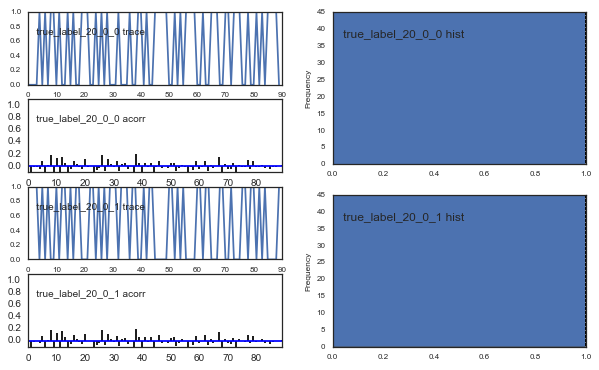

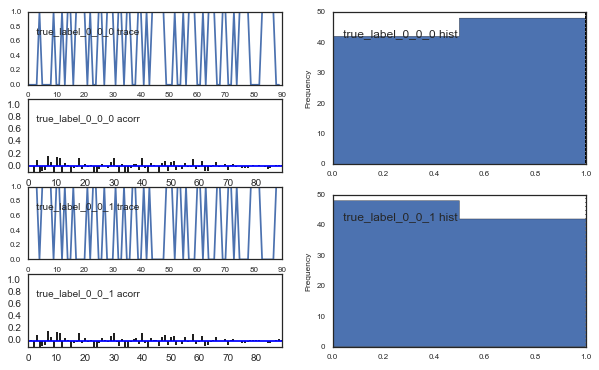

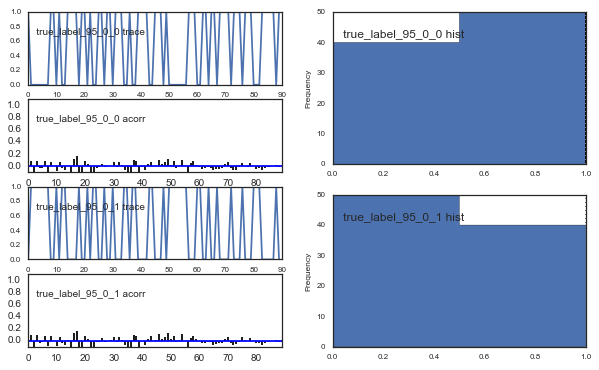

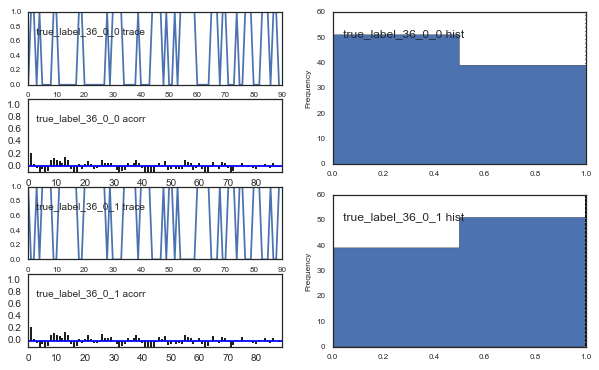

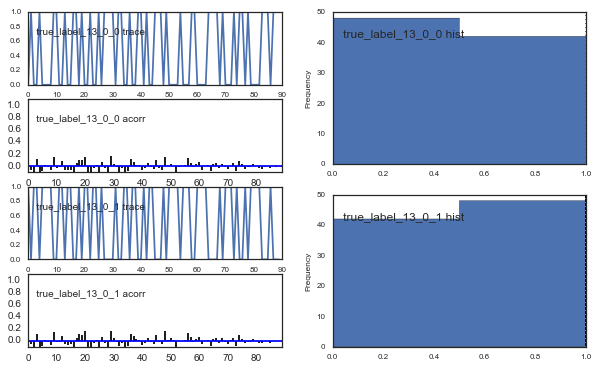

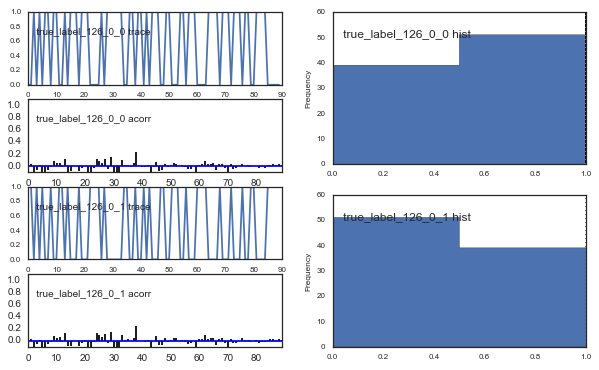

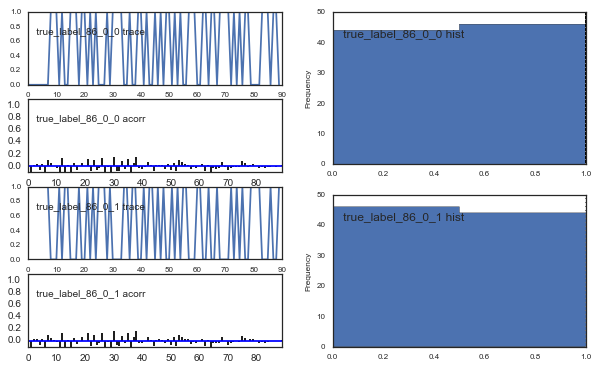

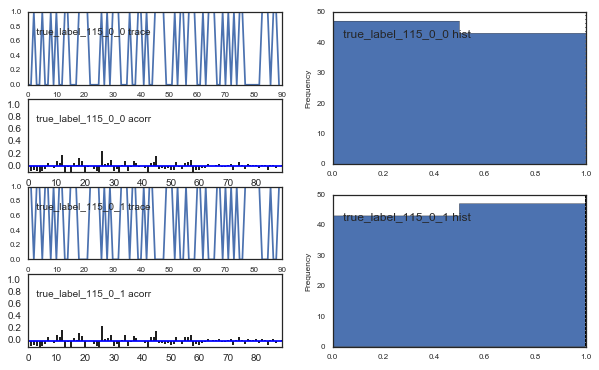

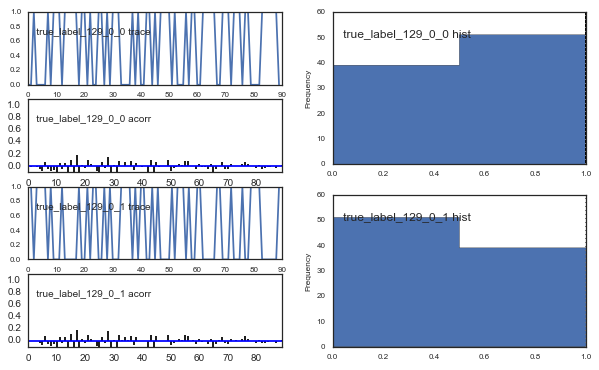

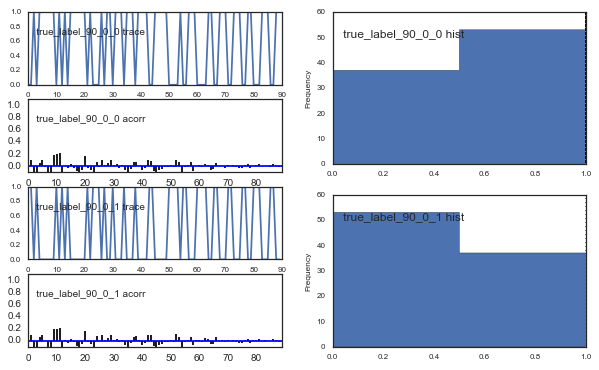

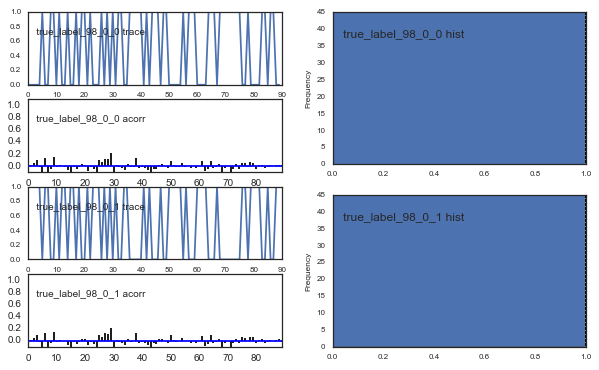

In [63]:

model = pm.Model([rho, rho_full, true_labels,confusion, confusion_full,])
M = pm.MCMC(model)
M.sample(iter=1000, burn=100, thin = 10)

# plot of variables
pm.Matplot.plot(M)


In [41]:
reports[16][2][1]

1.0